Goal: To write a code from scratch to perform K-means clustering on the iris data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Step 1: Load the data
iris = load_iris()
X = iris.data[:, :2]  # I'll be using the first 2 features for easy visualization


In [3]:
# Step 2: Defining K-Means from scratch
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def compute_wcss(X, labels, centroids):
    return sum(np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(len(centroids)))

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids
    wcss = compute_wcss(X, labels, centroids)
    return labels, centroids, wcss

In [4]:
# In order to explicitly define the number of clusters, we will try Different k values (2, 3, 4)
wcss_list = []
k_values = [2, 3, 4]

for k in k_values:
    labels, centroids, wcss = kmeans(X, k)
    wcss_list.append(wcss)
    print(f"K={k} → WCSS = {wcss:.2f}")

K=2 → WCSS = 58.45
K=3 → WCSS = 37.05
K=4 → WCSS = 28.41


# Visualization for best K

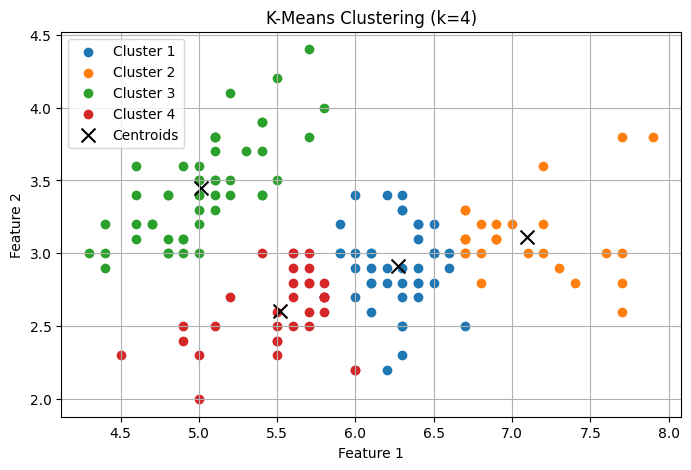

In [5]:
# Choose best k (based on lowest WCSS)
best_k_index = np.argmin(wcss_list)
best_k = k_values[best_k_index]
labels, centroids, _ = kmeans(X, best_k)

# Plot
plt.figure(figsize=(8, 5))
for i in range(best_k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-Means Clustering (k={best_k})")
plt.legend()
plt.grid(True)
plt.show()

# Summary: K-Means Clustering

After experimenting with K values of 2, 3, and 4 using the elbow method, I noticed the sharpest drop in WCSS occurred between K=2 and K=3, suggesting that 3 might be the optimal number of clusters. However, when plotting K=4, I noticed more refined separation between the points, likely due to added complexity in the features that allowed better clustering.

So even though K=3 technically marks the elbow, K=4 may better reflect meaningful subgroupings in the data. The clusters are visually distinct and more balanced, which could suggest that increasing K to 4 captures more structure without overfitting.